In [74]:
from calcium_signal import CalciumSignal
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import utils
root = '/Users/apple/Ma Lab/neuMatrix/cluster/{num}/suite2p/plane0'
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [75]:
class Suite2PCalciumSignal():
	def __init__(self, path, std=1.5):
		data = np.load(os.path.join(path, 'F.npy'))
		self.fr = pd.DataFrame(data)
		self.regu_fr = utils.regu(self.fr.copy())
		self.peak = utils.peak_std(self.regu_fr.copy(),p=std)
		self.with_peak = self.peak.loc[~(self.peak==0).all(axis=1)].index
		self.name = path.split('/')[-3]
		iscell_raw = np.load(os.path.join(path, 'iscell.npy'), allow_pickle=True)
		iscell_raw = iscell_raw[:,0]
		self.iscell = np.where(iscell_raw == 1)
		self.index = self.regu_fr.index

	def plot_curve(self, idx:int, show:str= False, save:bool= None):
		# assert idx in self.regu_fr, 'The index is not in the peak region'
		plt.figure(figsize=(10,5))
		plt.plot(self.regu_fr.loc[idx], label='Original')
		plt.plot(self.peak.loc[idx], label='Peak')
		plt.legend()
		plt.ylim(-0.1, 1.5)
		plt.title(f'Firing curve of cell #{idx} in {self.name}')
		if show:
			plt.show()
		if save is not None:
			plt.savefig(os.path.join(save, self.name) + f'_curve_{idx}.svg')
		# plt.close()

	def plot_firing(self, peak_only = False, iscell =False, show = False, save = None):
		regu_fr = self.regu_fr
		if peak_only: 
			regu_fr = self.regu_fr.loc[self.with_peak]

		if iscell:
			regu_fr = regu_fr.iloc[self.iscell]
			
		# plt.imshow(regu_fr)
		# sns.clustermap(regu_fr, vmax = 1.5, vmin=0, col_cluster=False, col_linkage=False, cmap='viridis')
		plt.figure(figsize=(10,5))
		sns.heatmap(regu_fr, vmax = 1.5, vmin=0, cmap='viridis', yticklabels=True)
		if show:
			plt.show()  
		if save is not None:
			plt.savefig(os.path.join(save, self.name) + '_firing.svg')




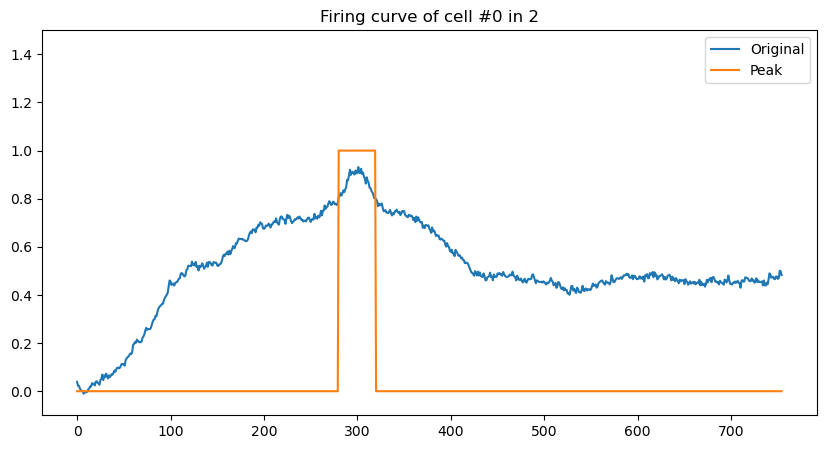

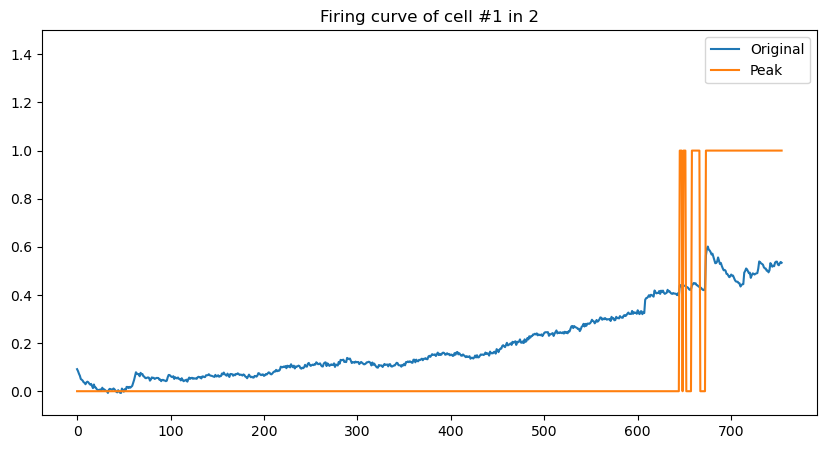

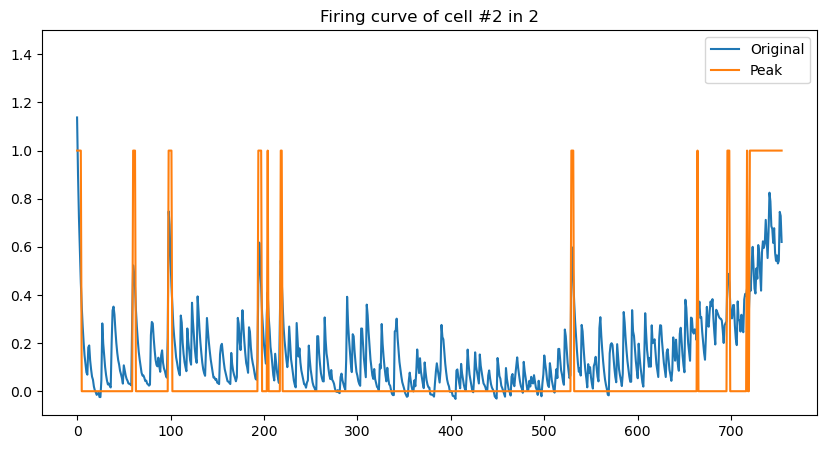

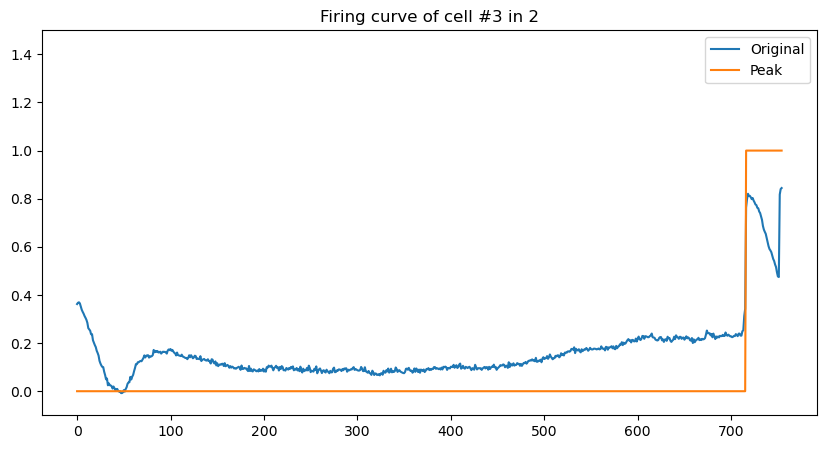

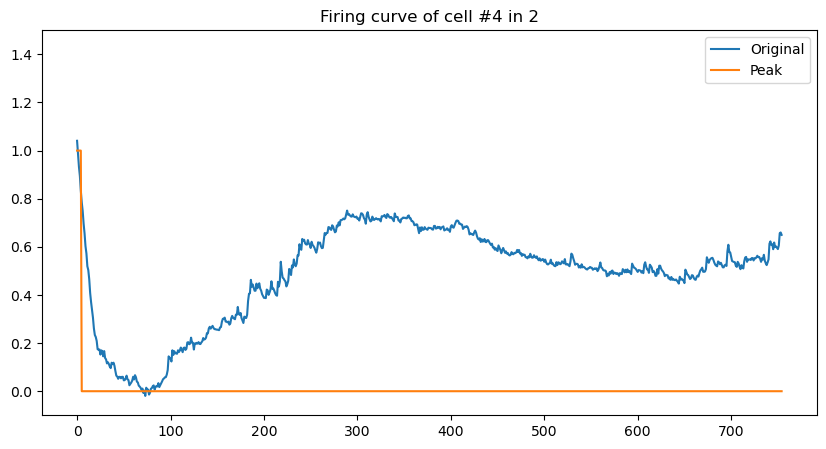

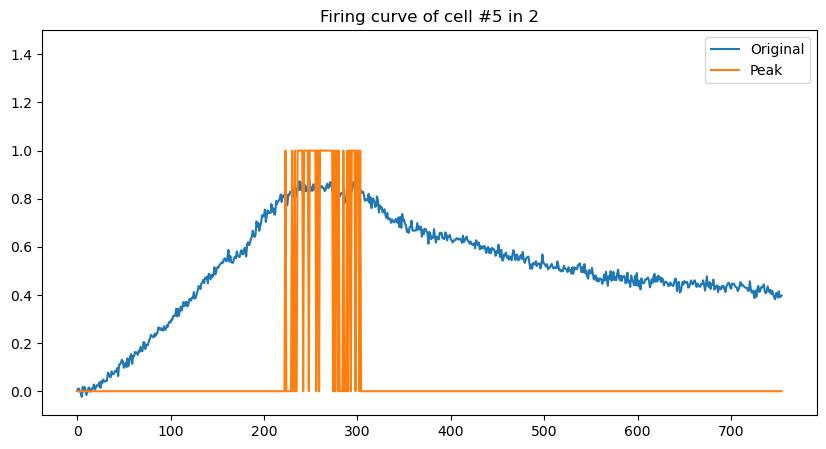

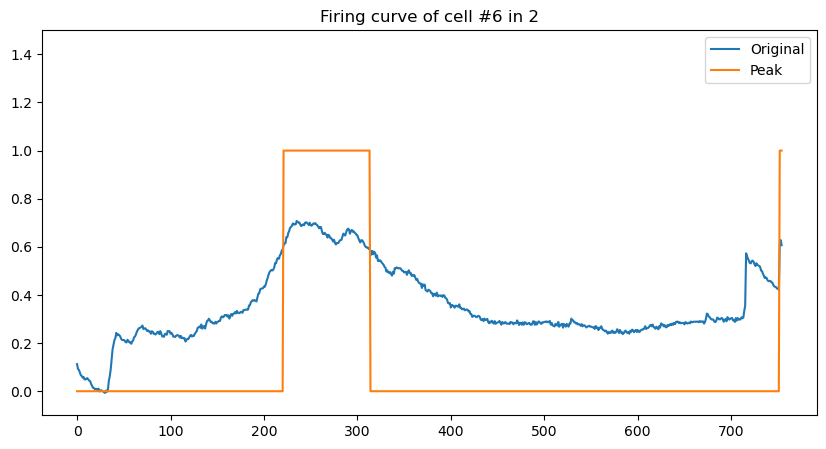

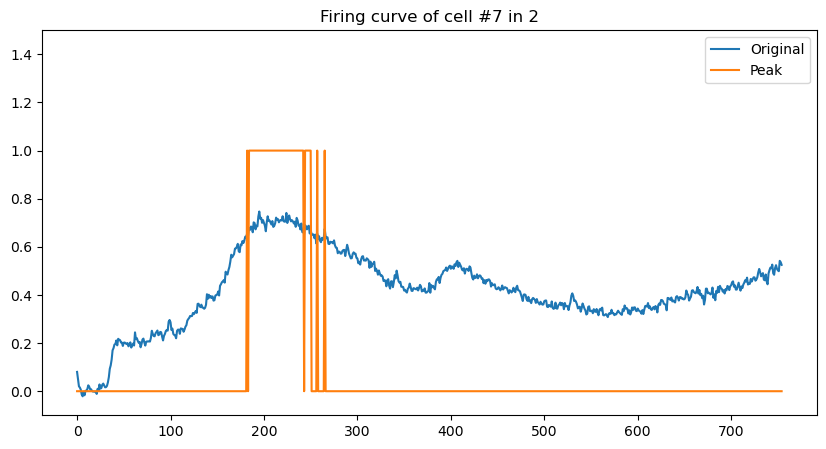

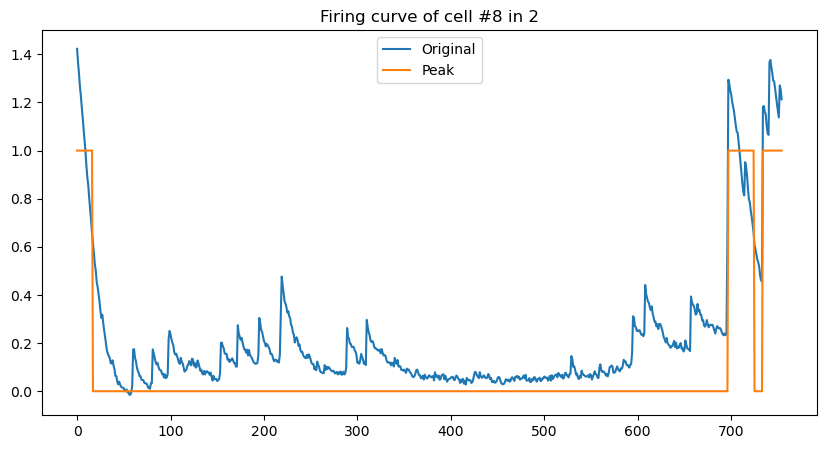

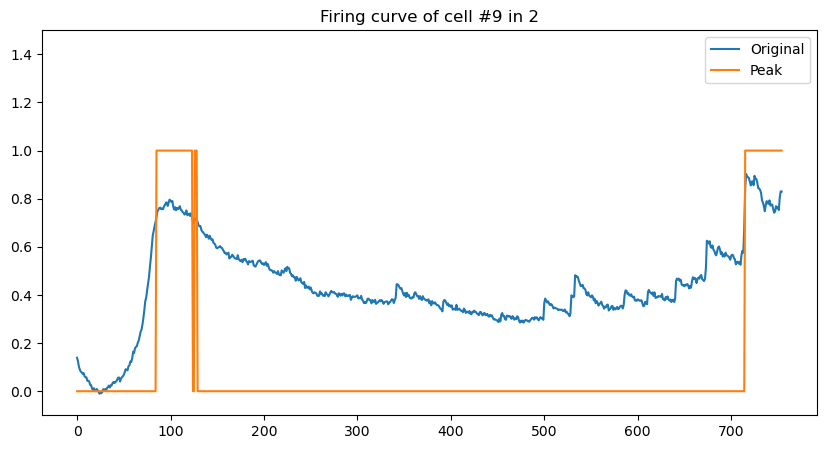

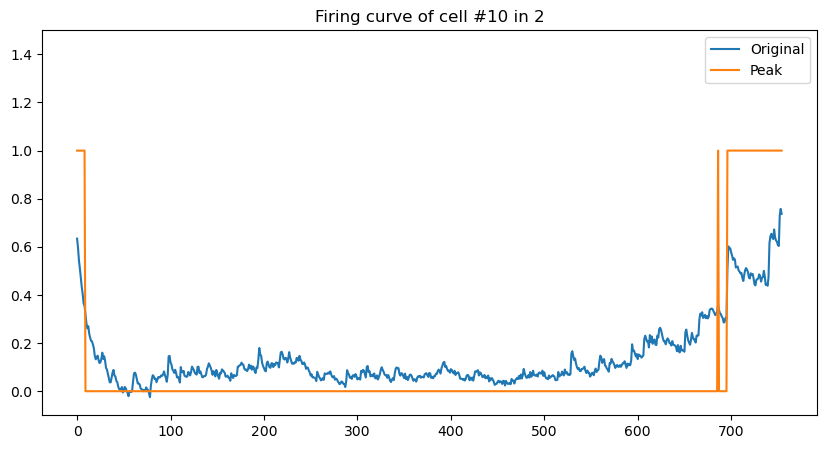

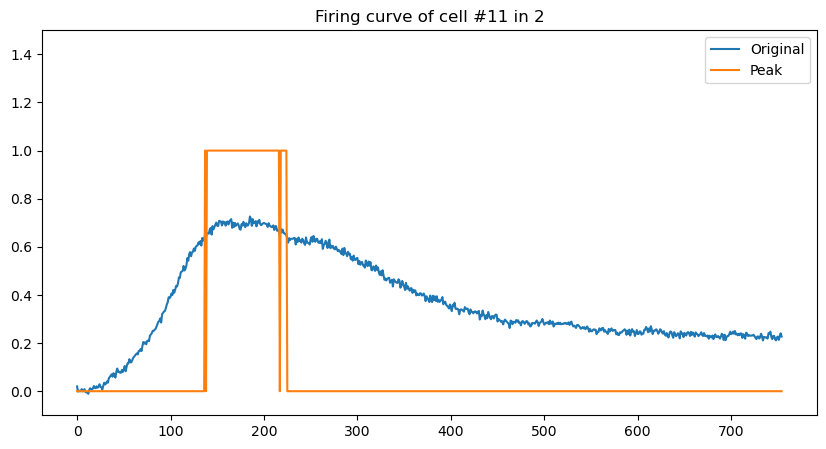

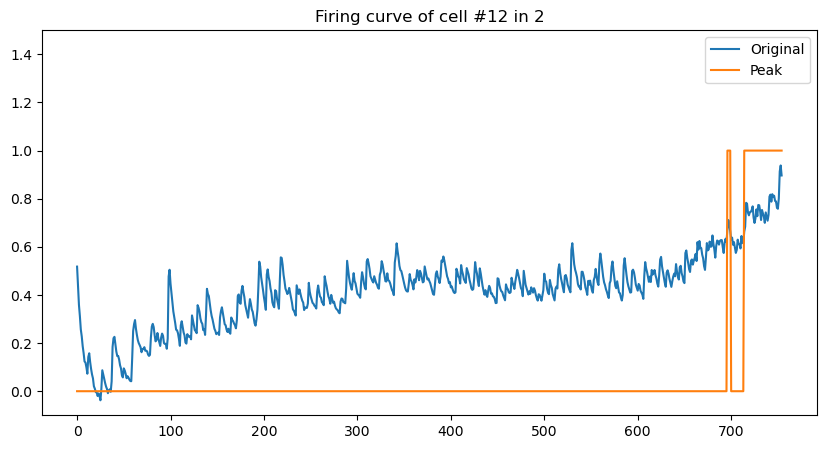

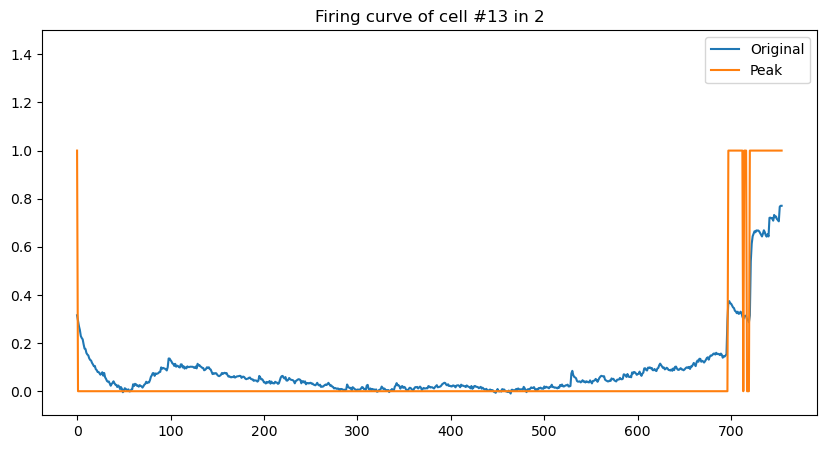

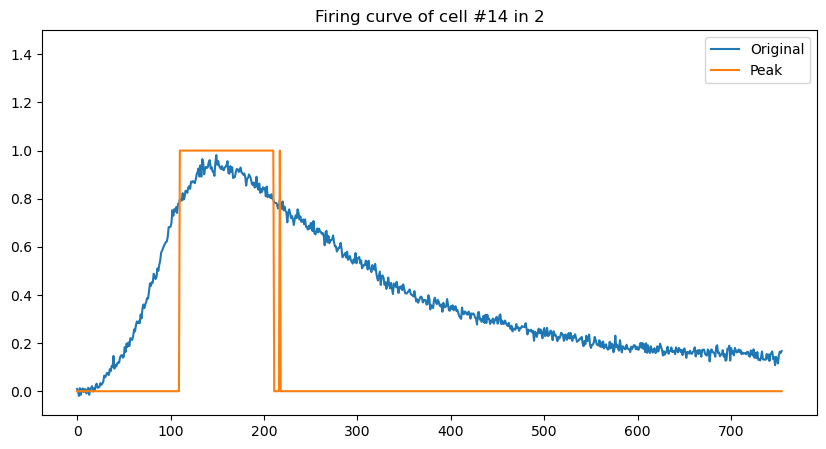

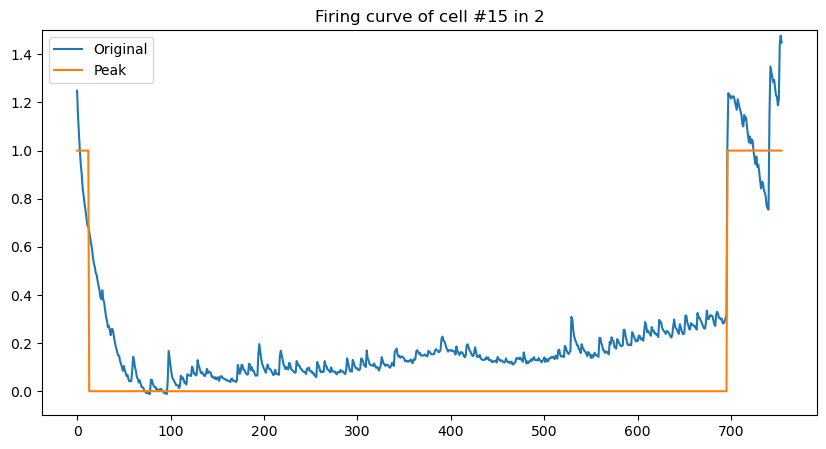

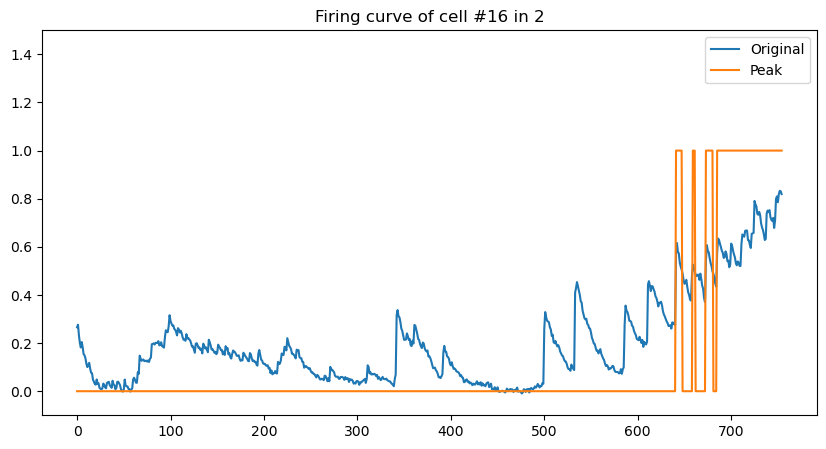

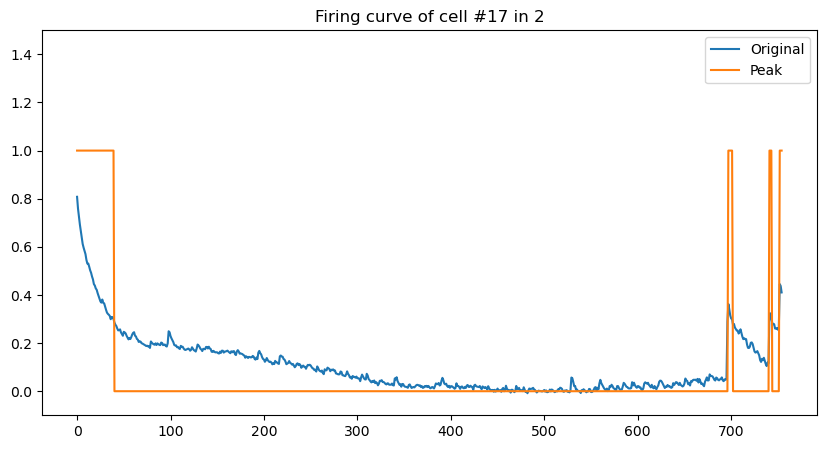

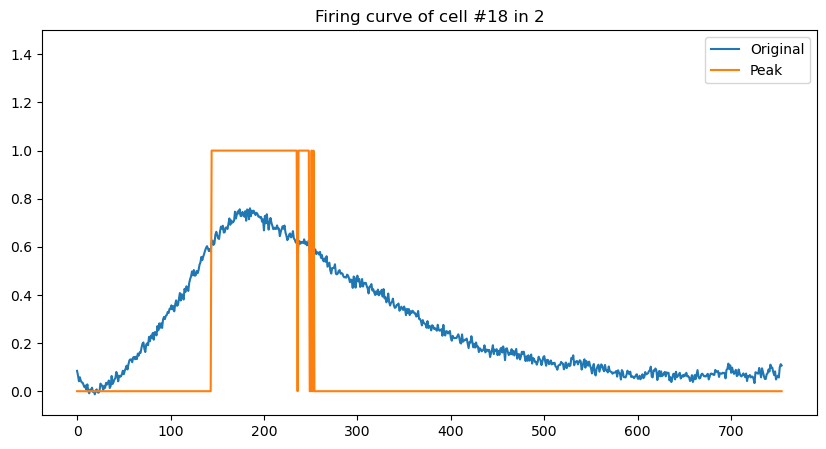

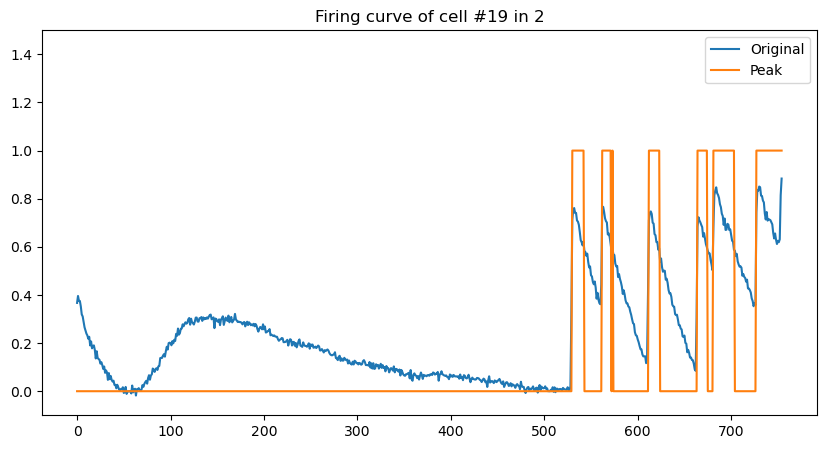

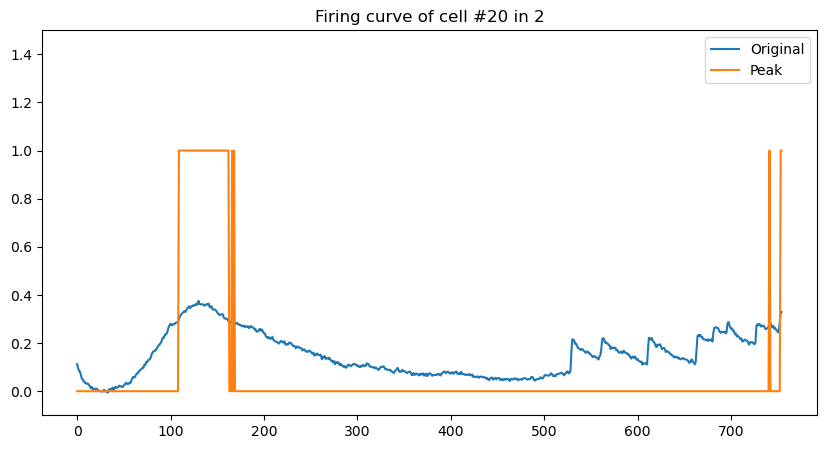

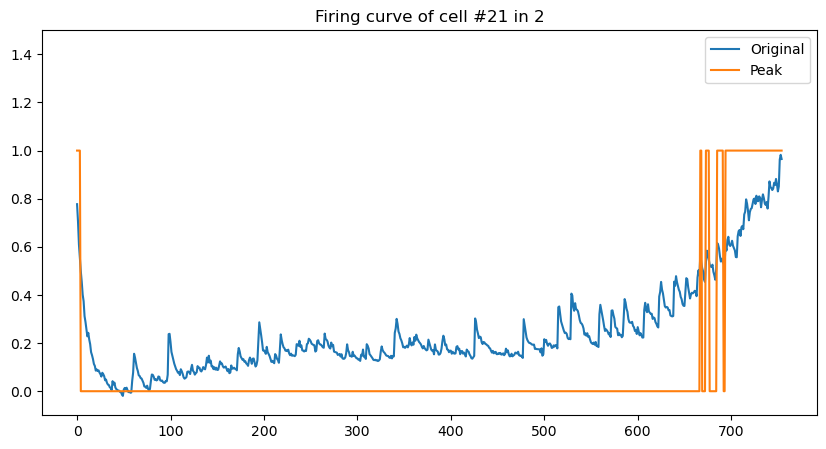

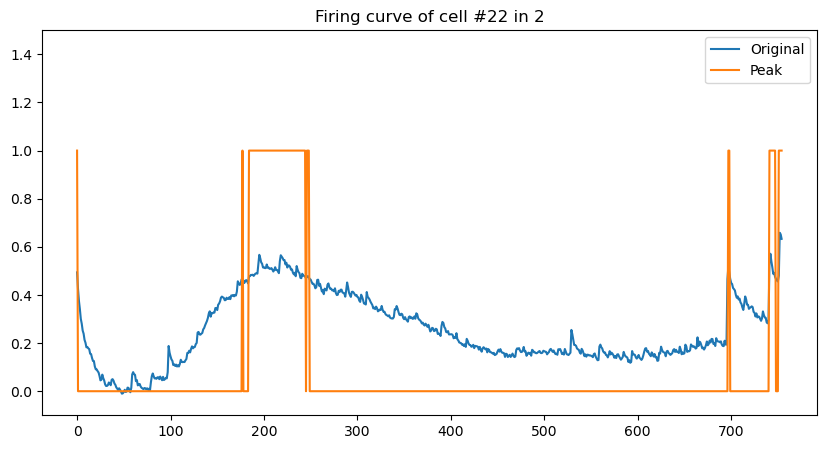

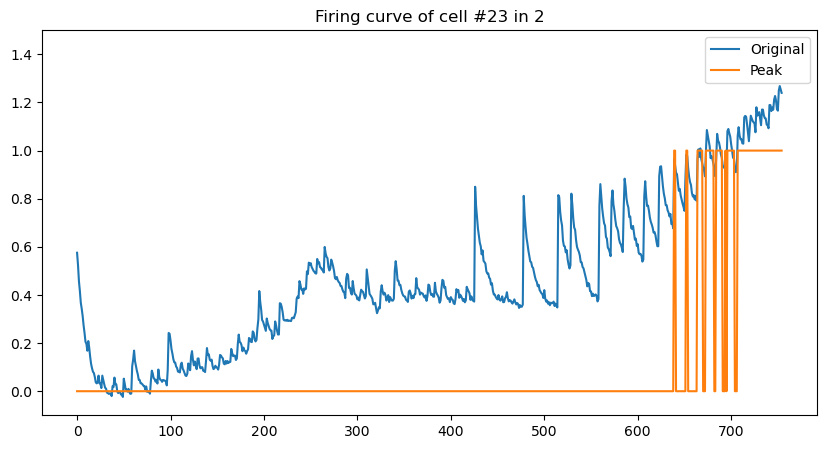

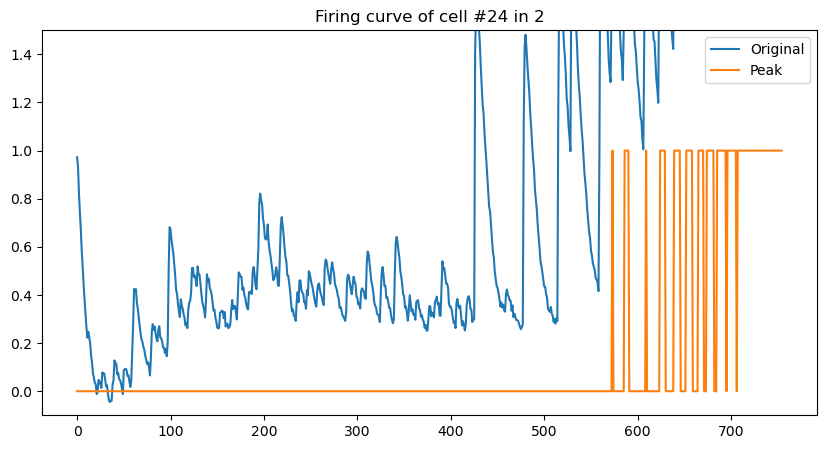

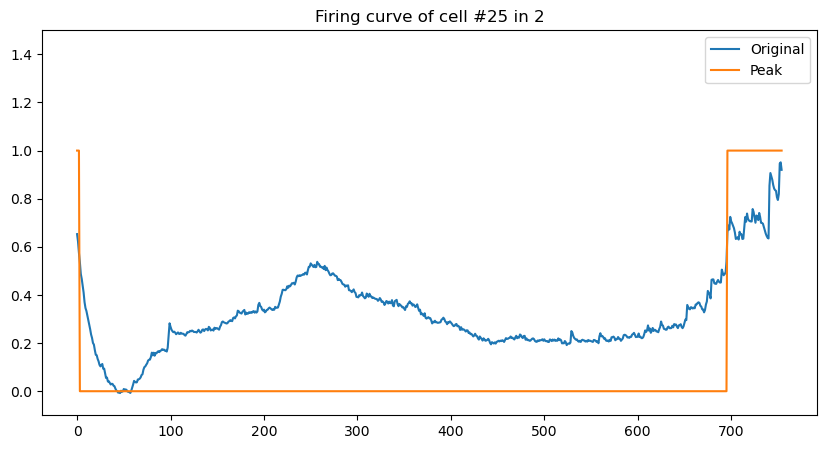

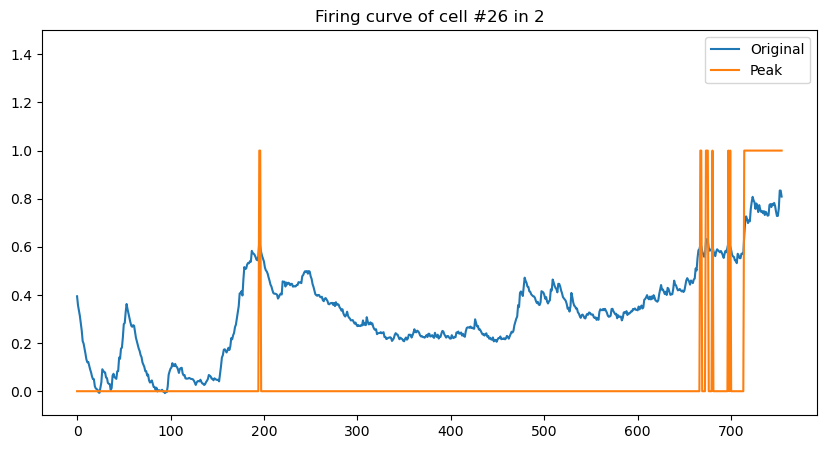

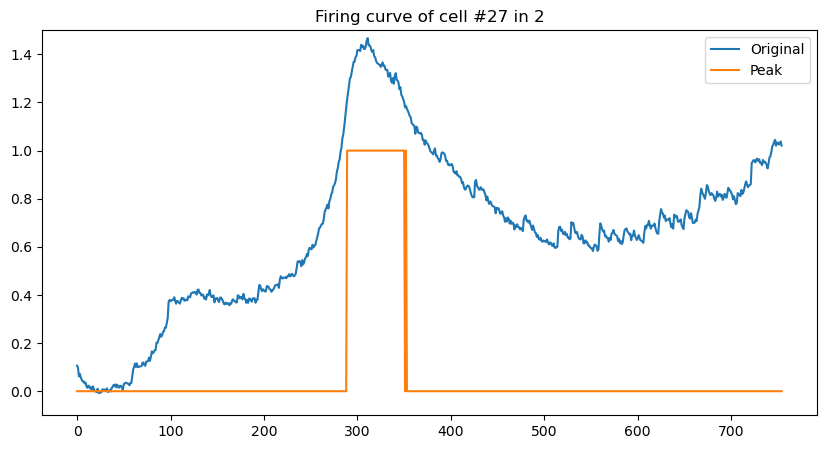

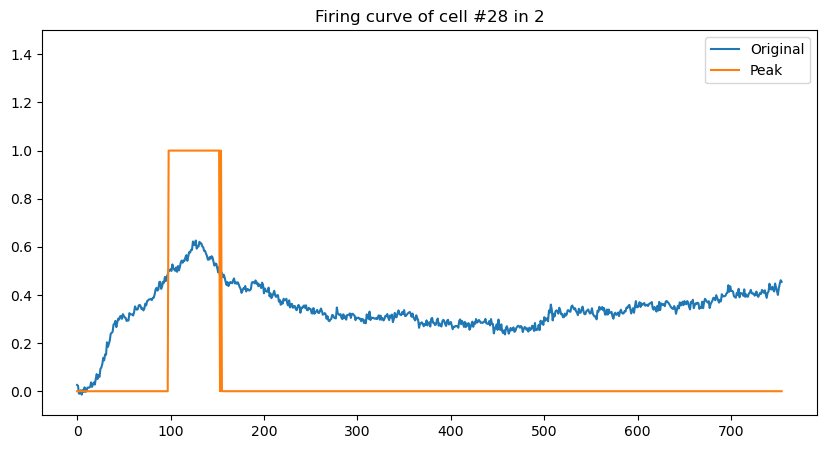

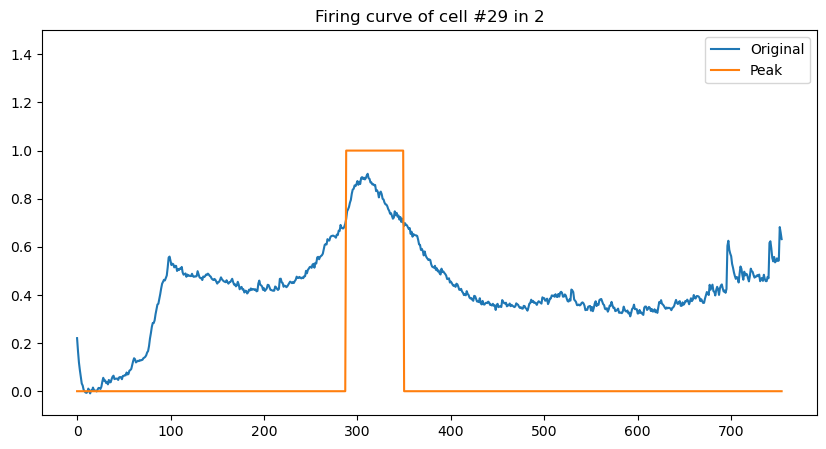

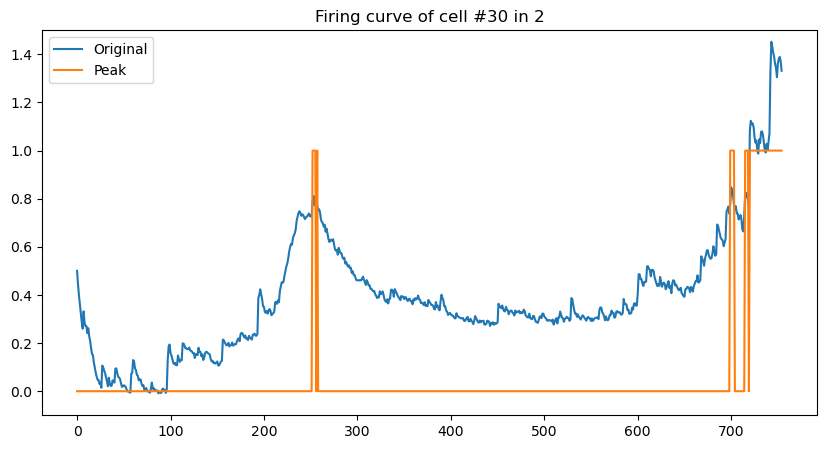

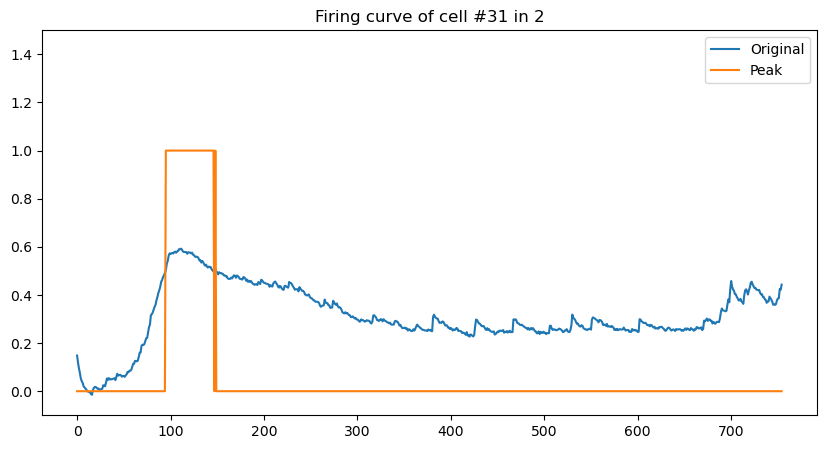

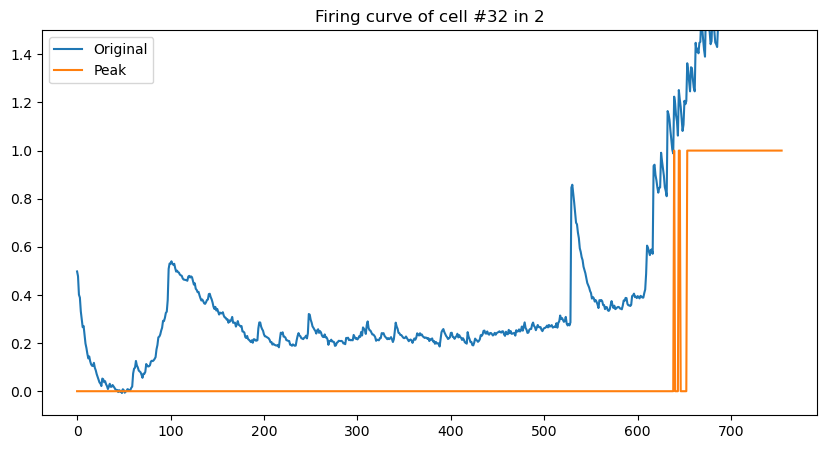

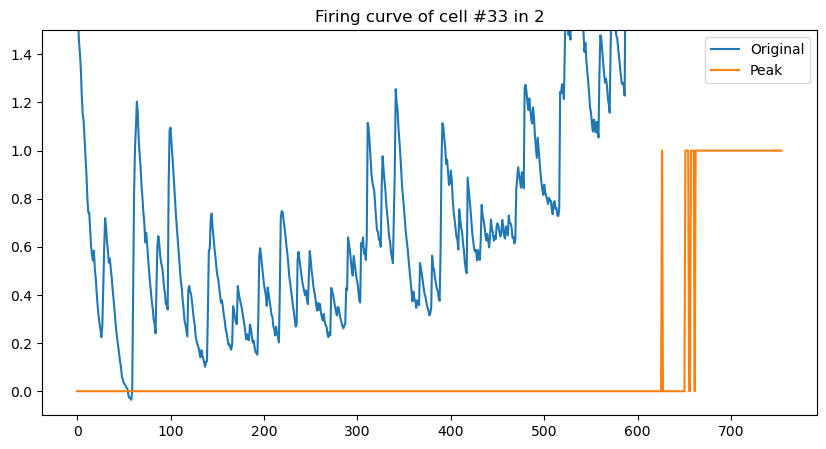

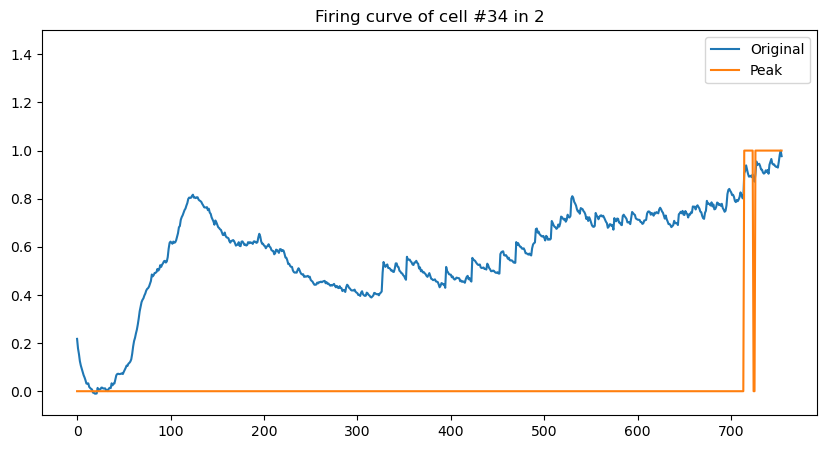

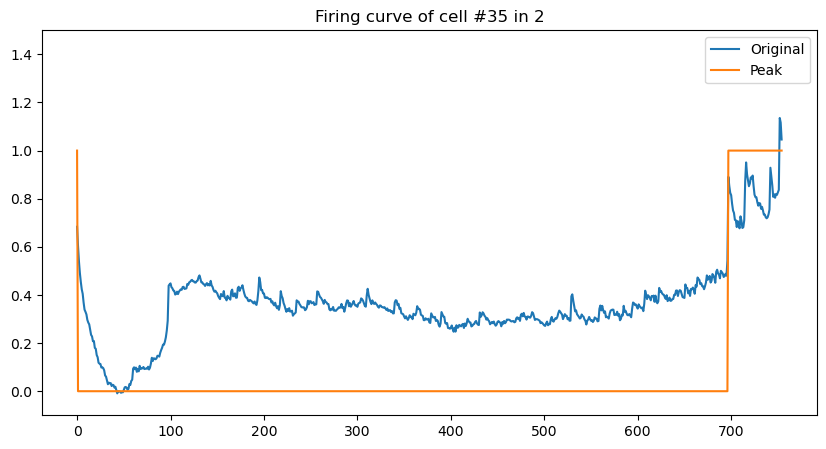

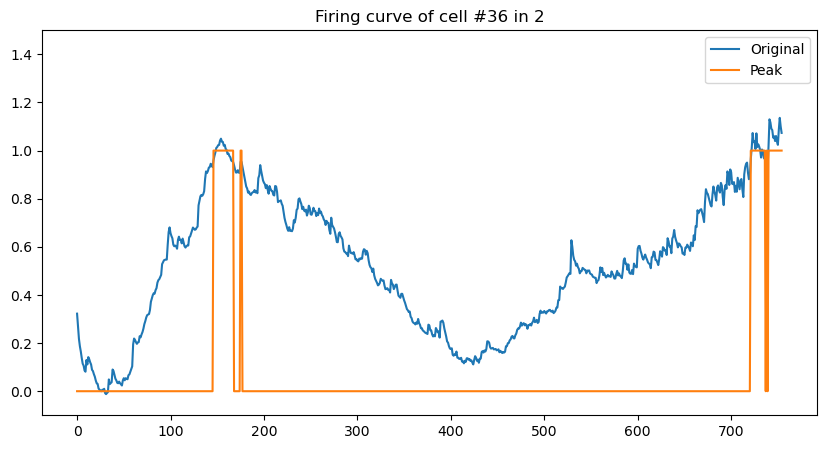

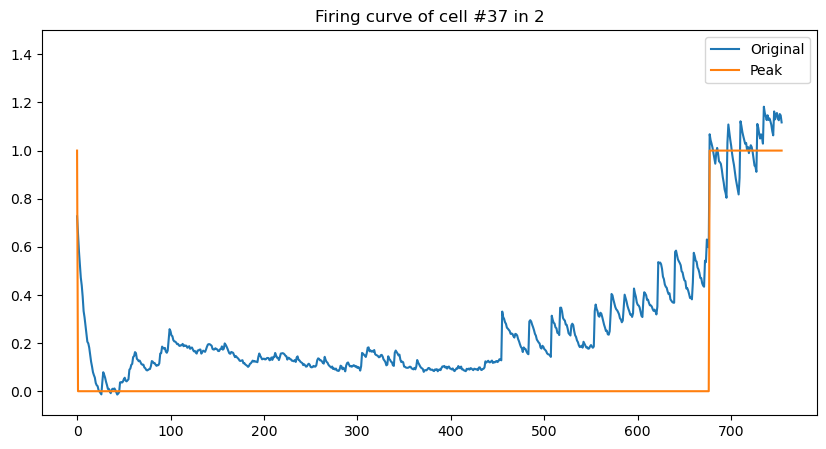

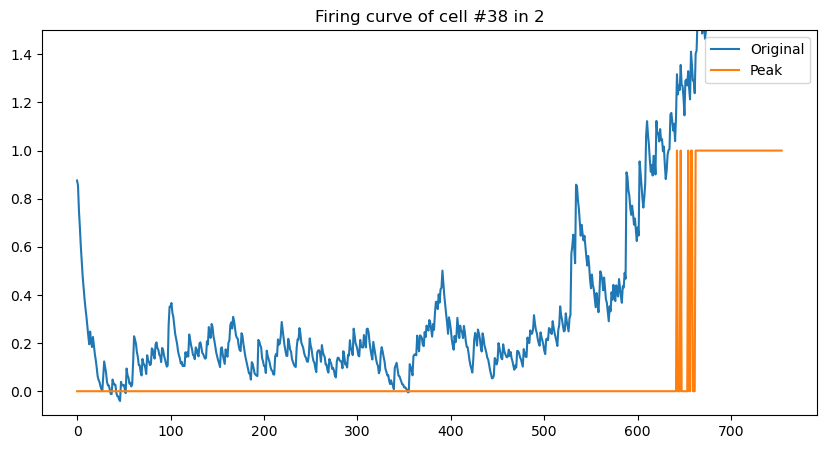

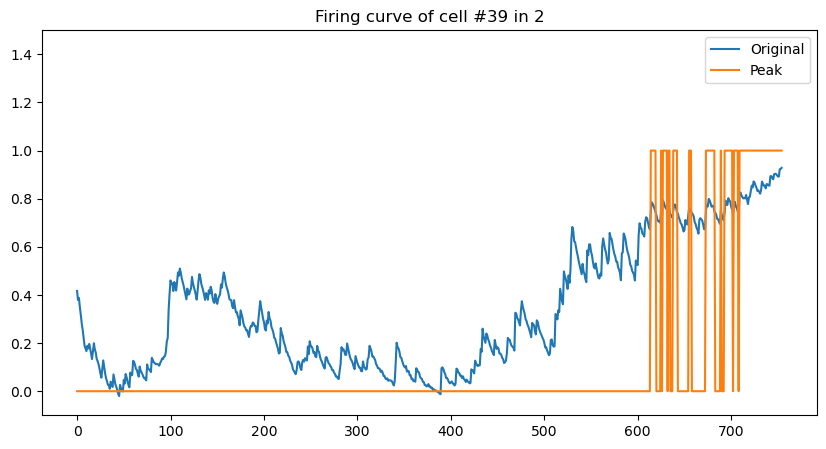

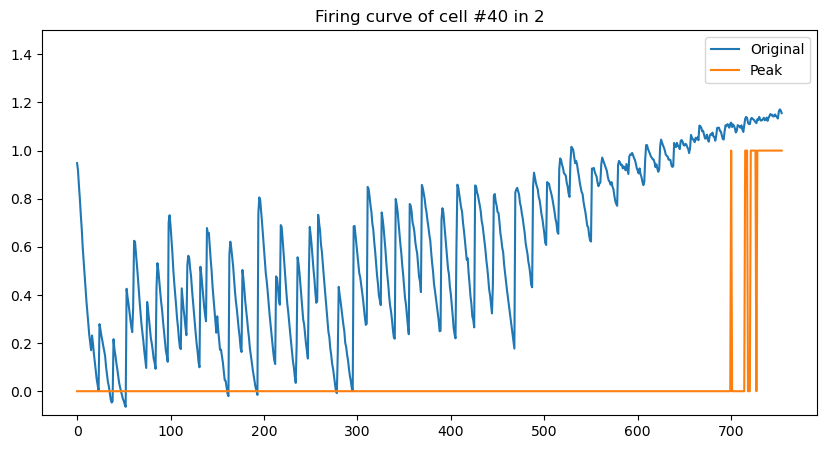

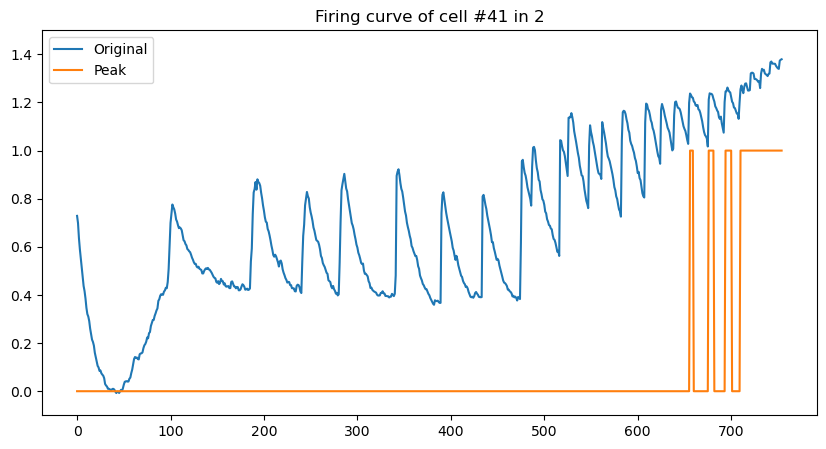

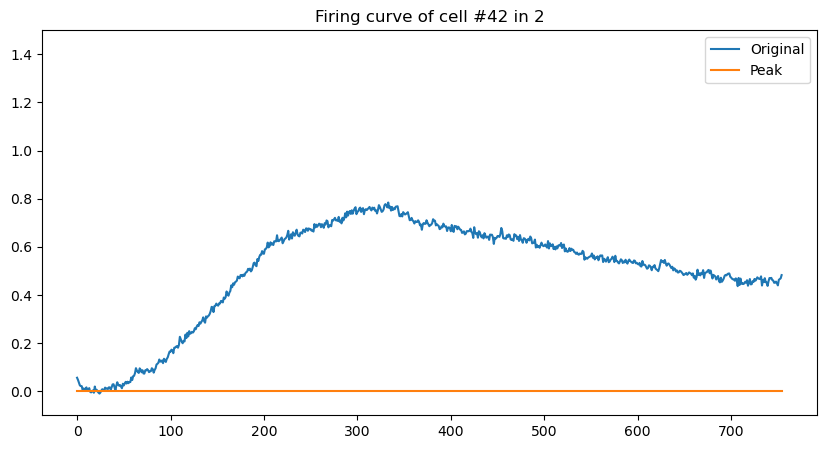

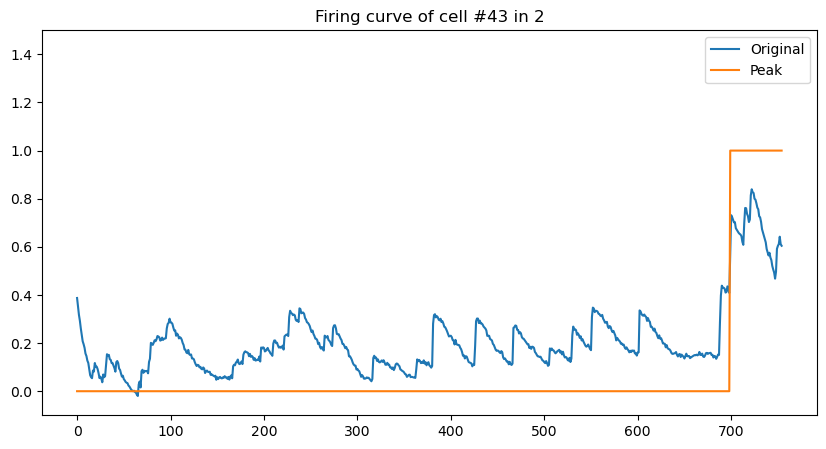

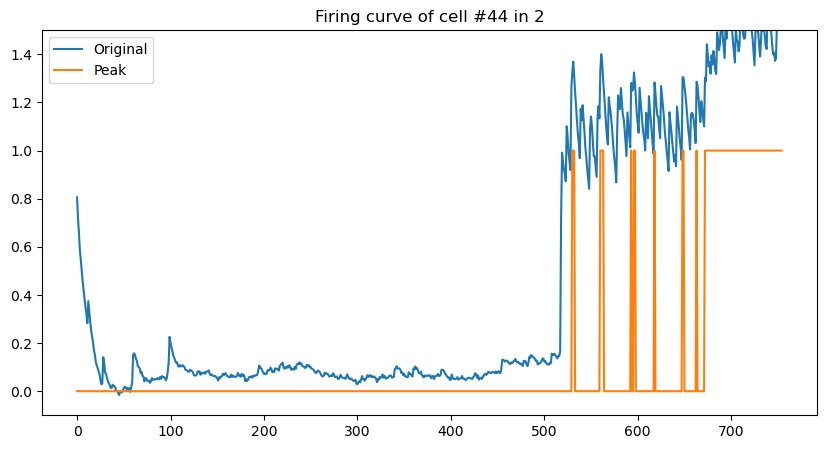

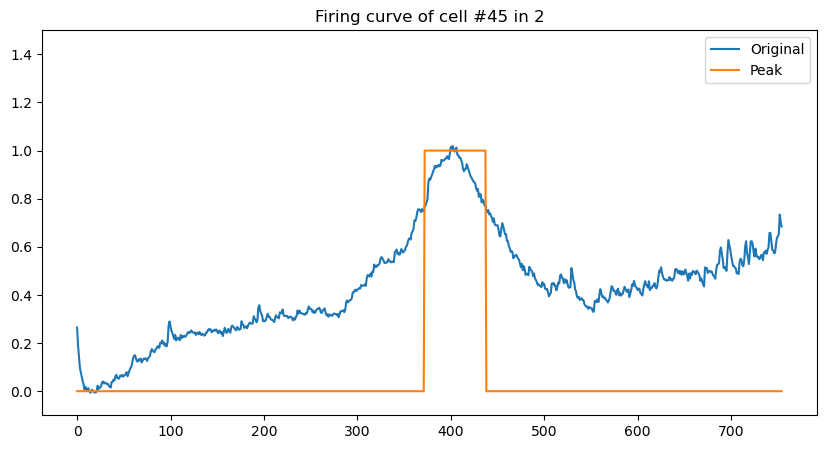

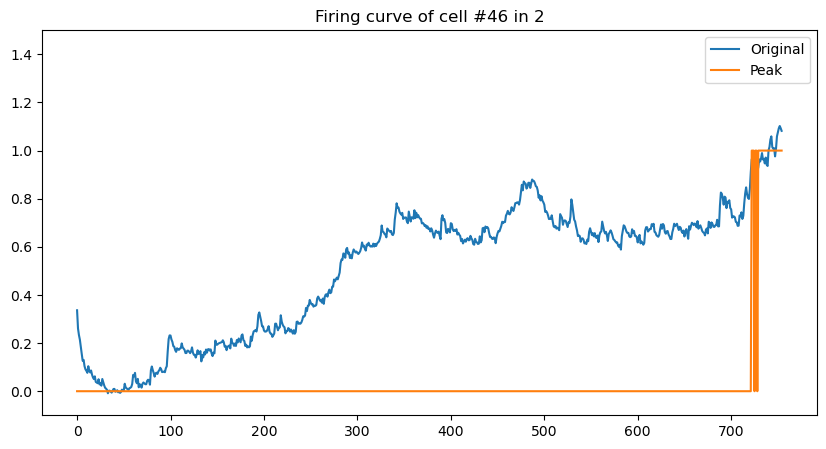

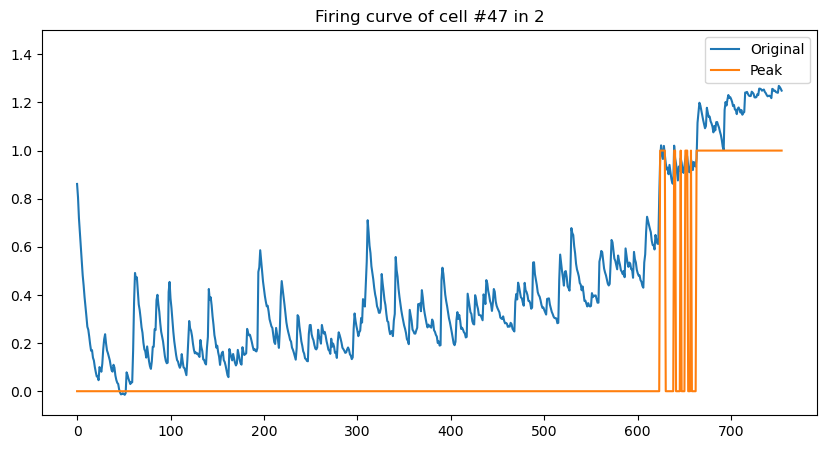

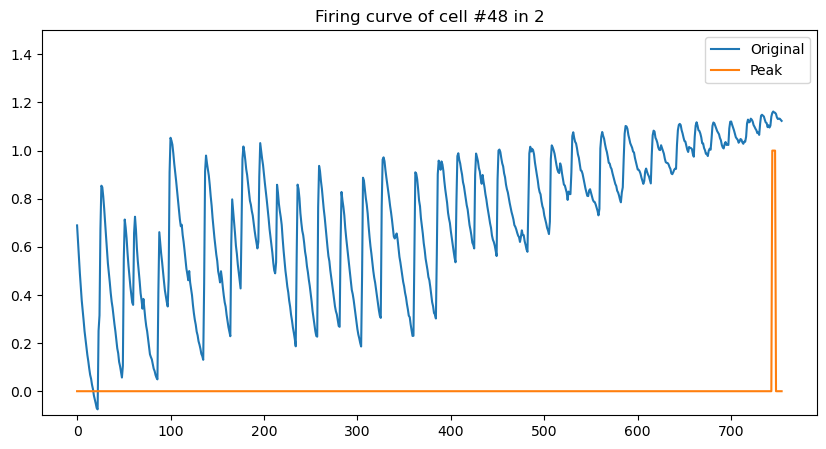

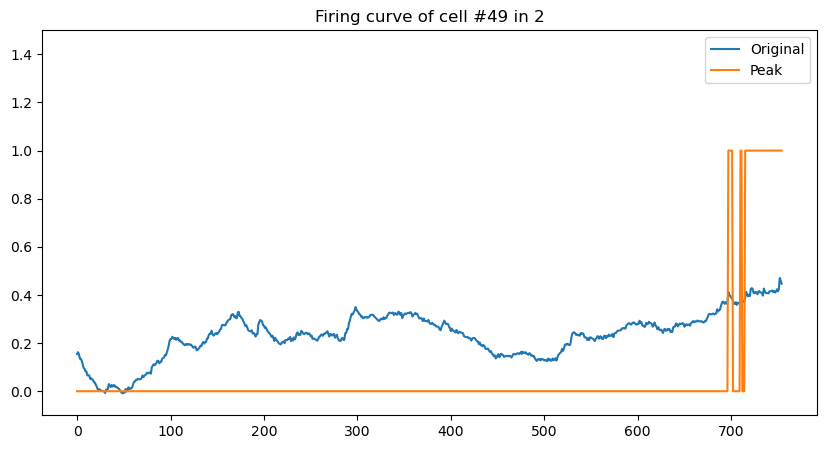

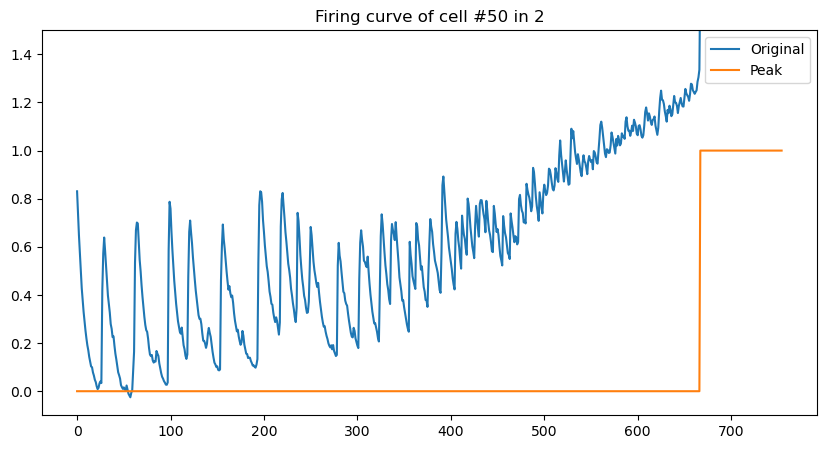

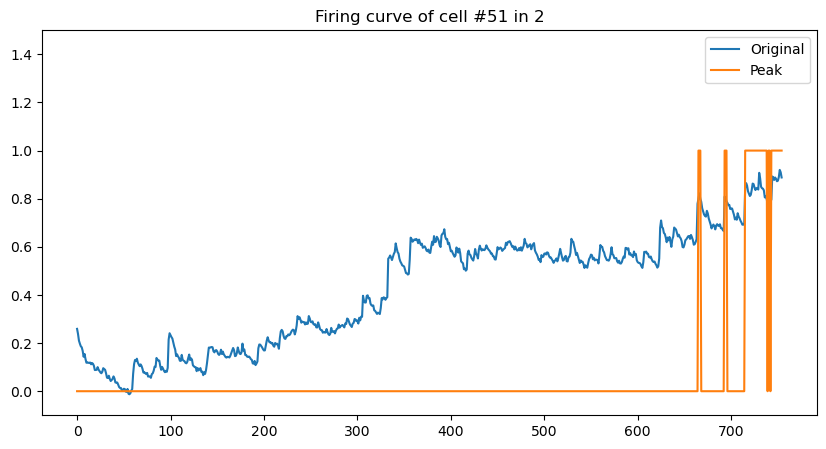

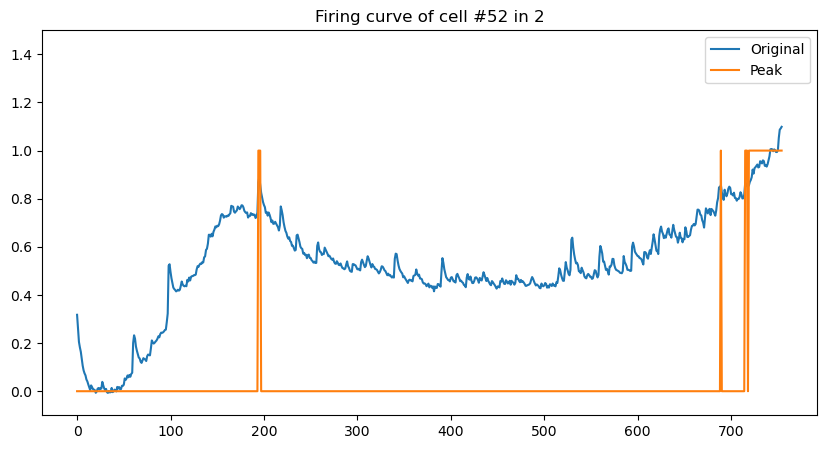

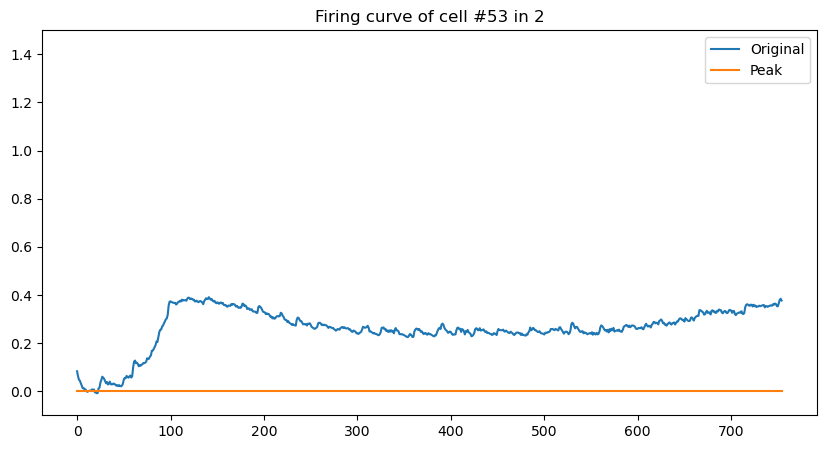

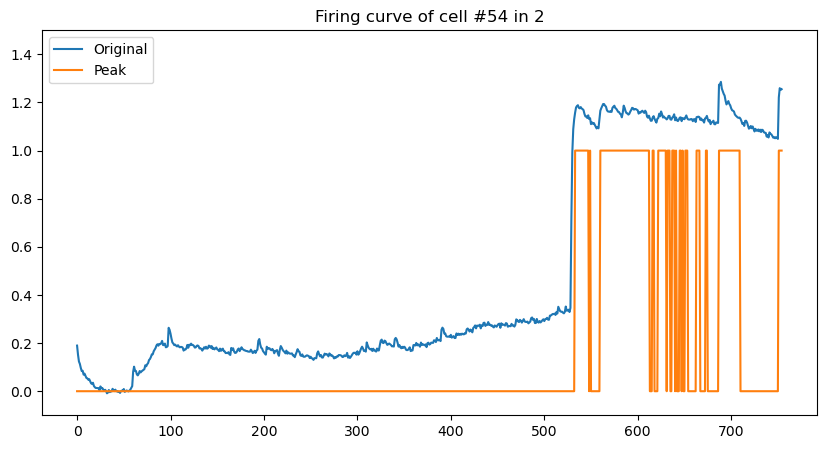

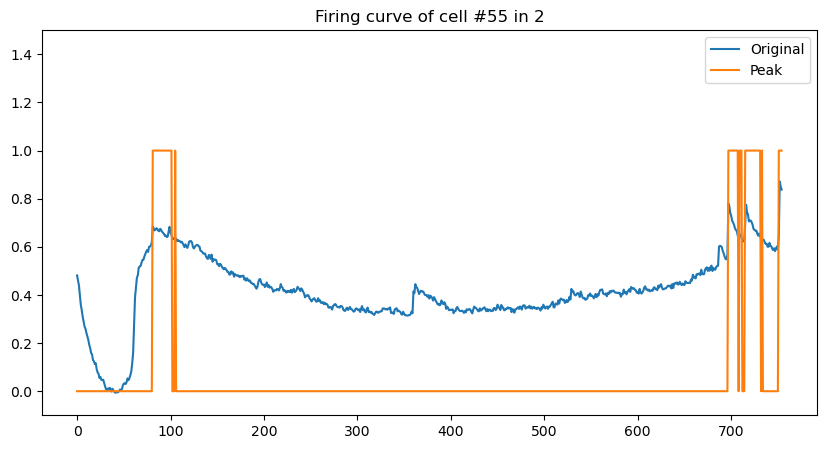

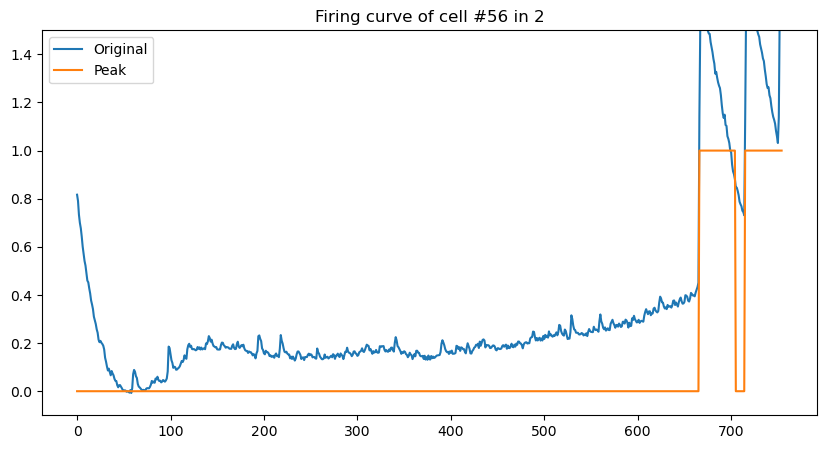

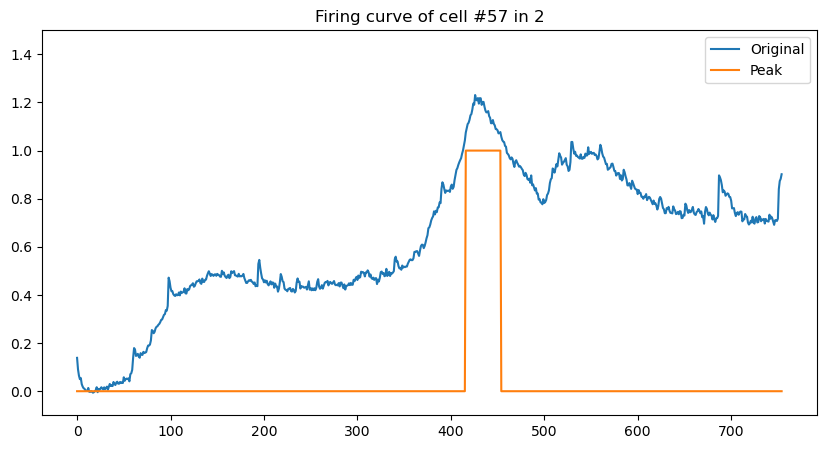

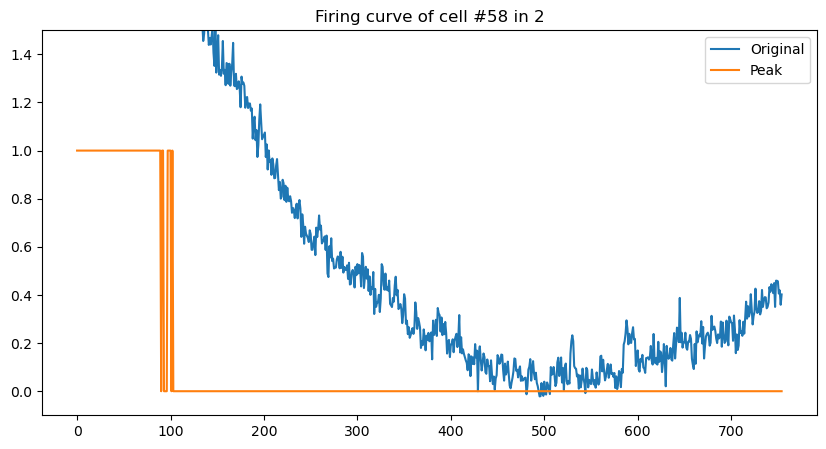

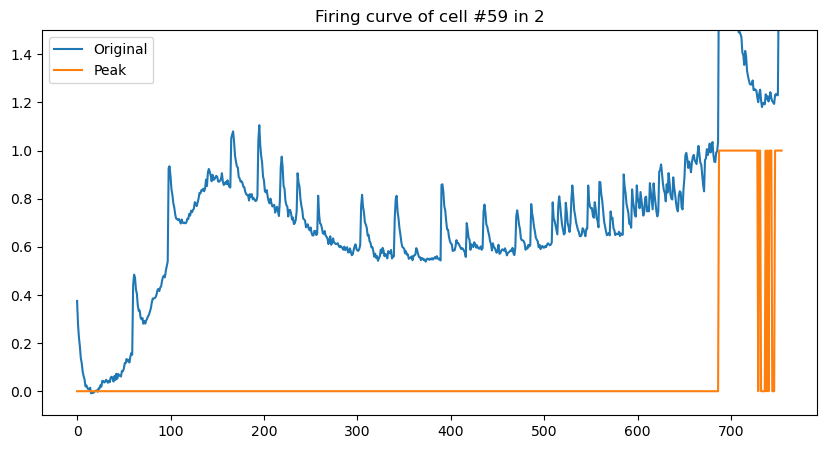

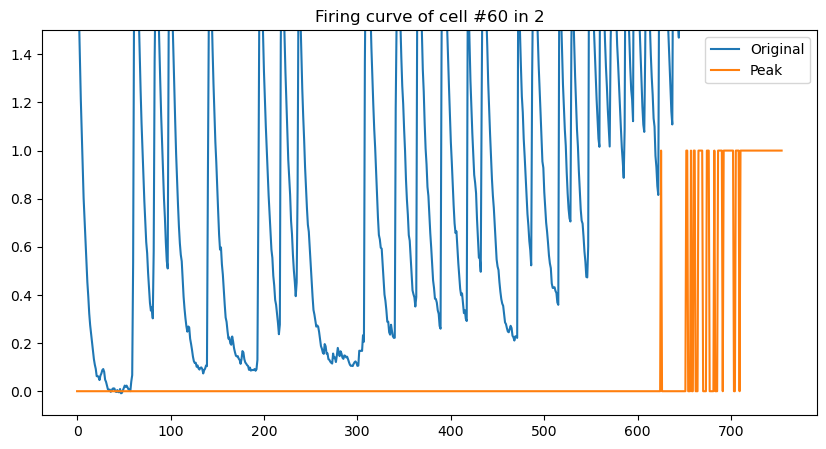

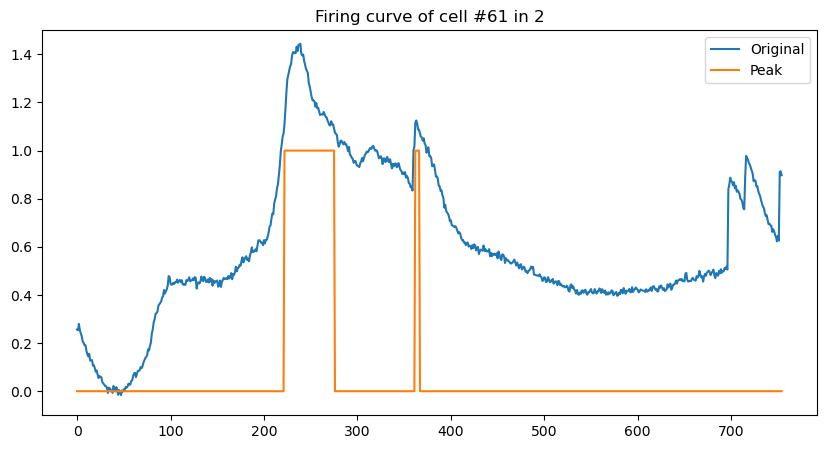

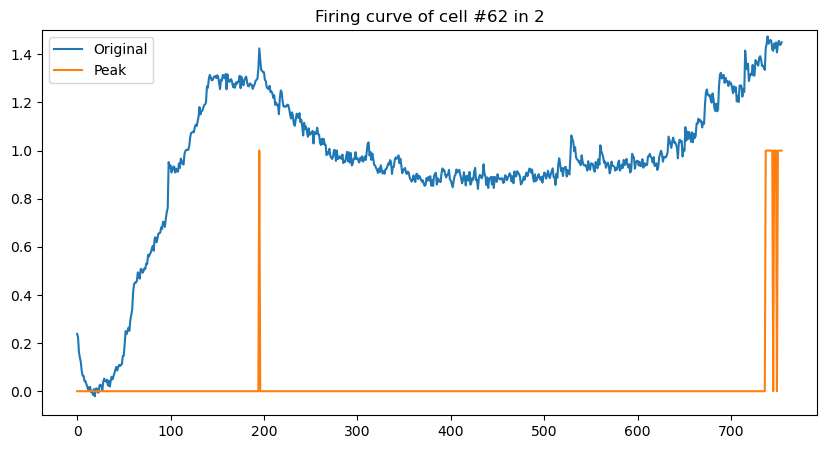

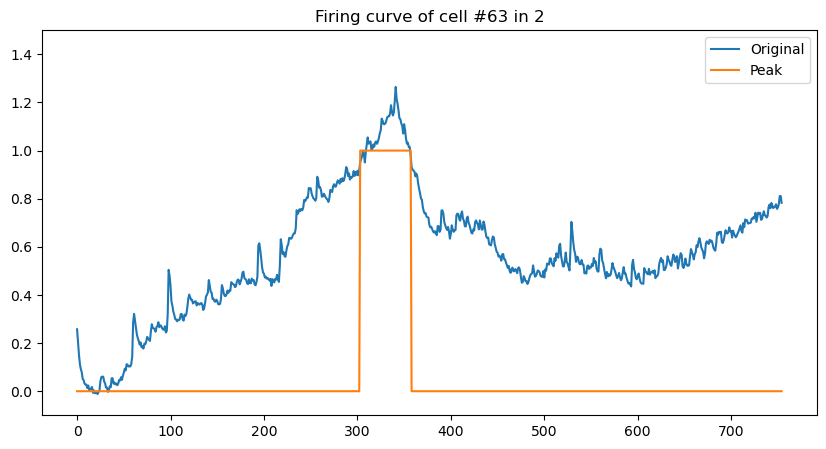

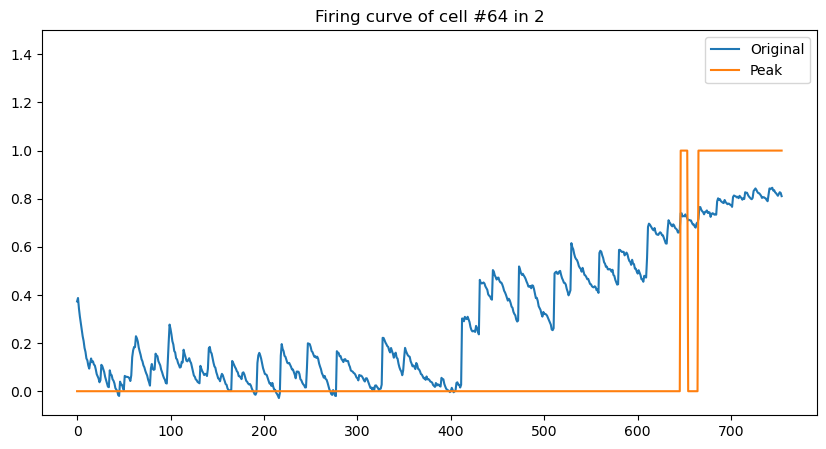

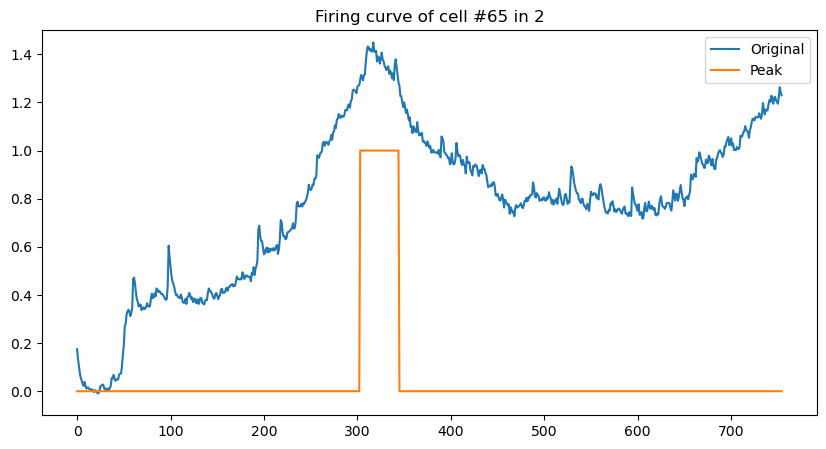

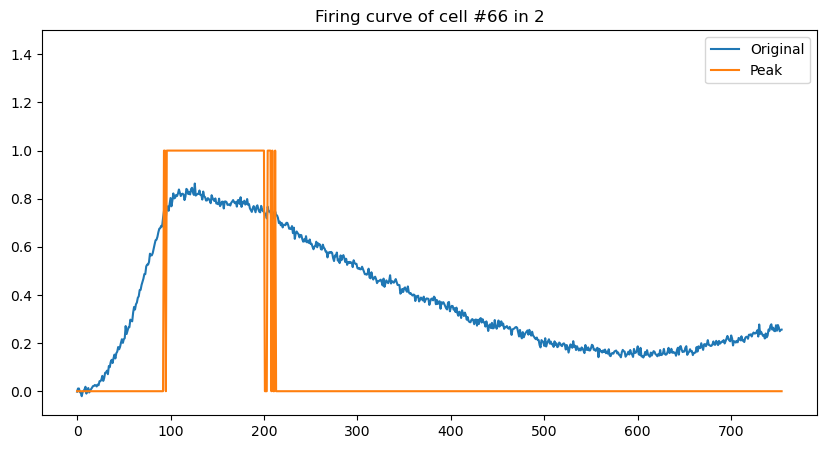

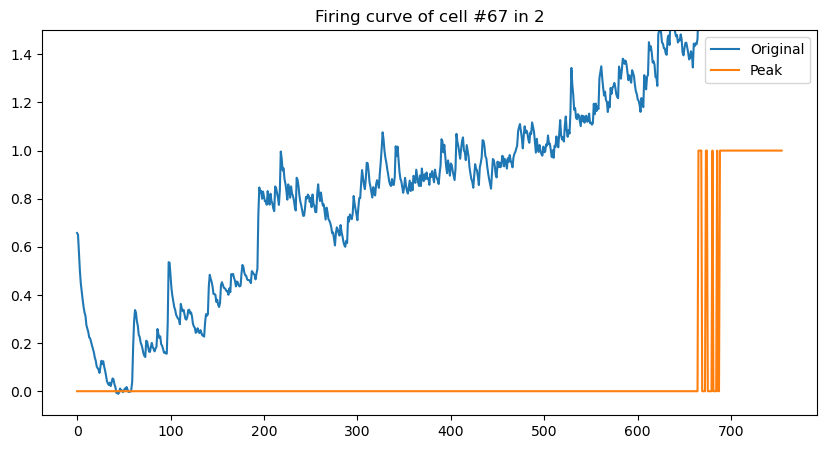

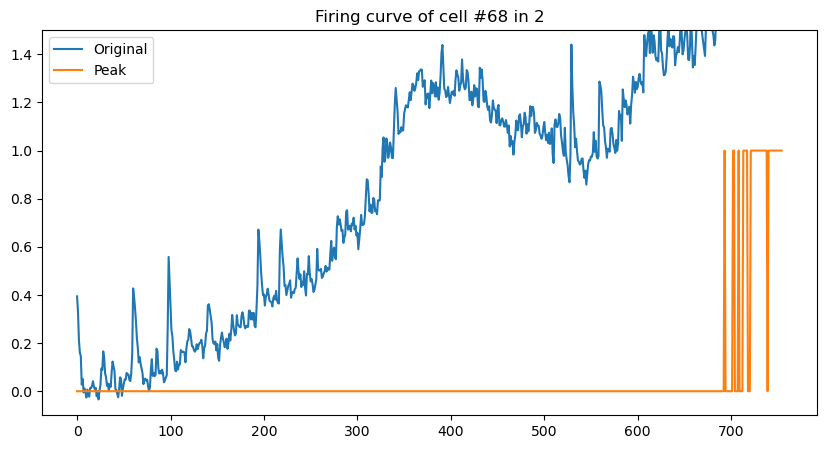

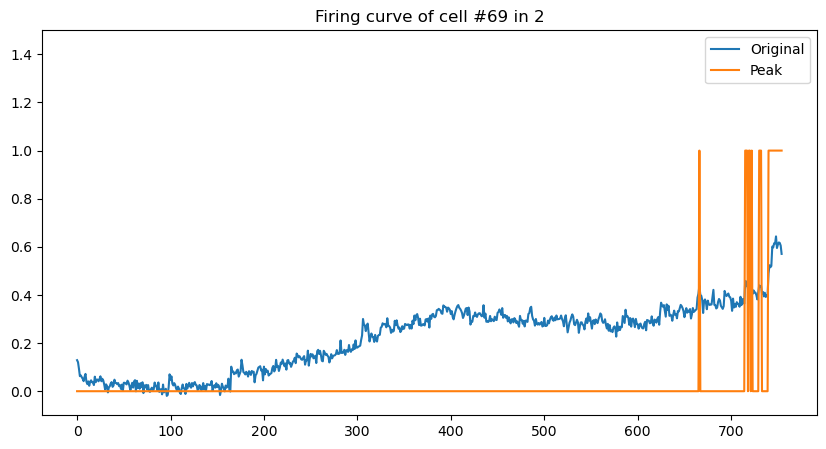

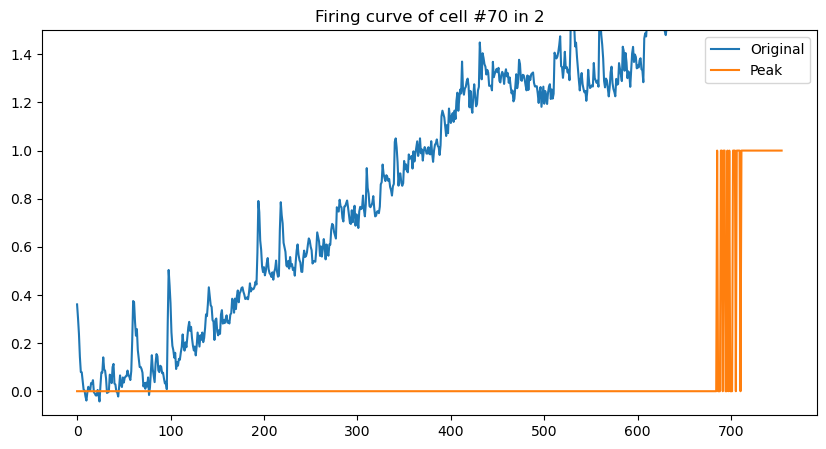

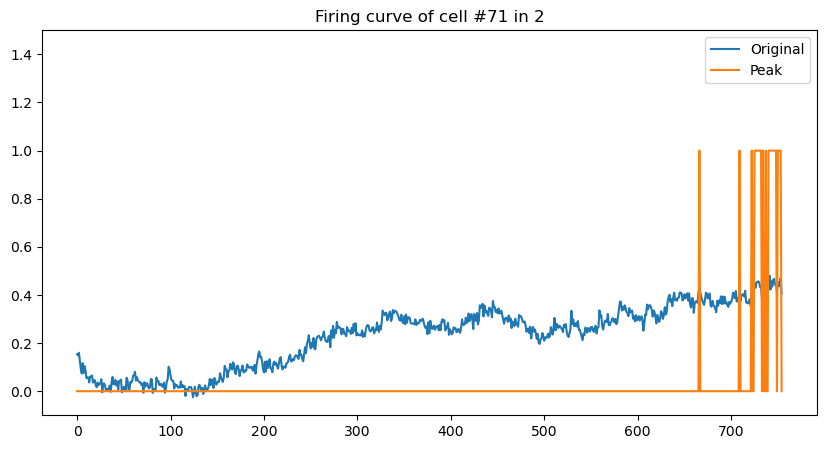

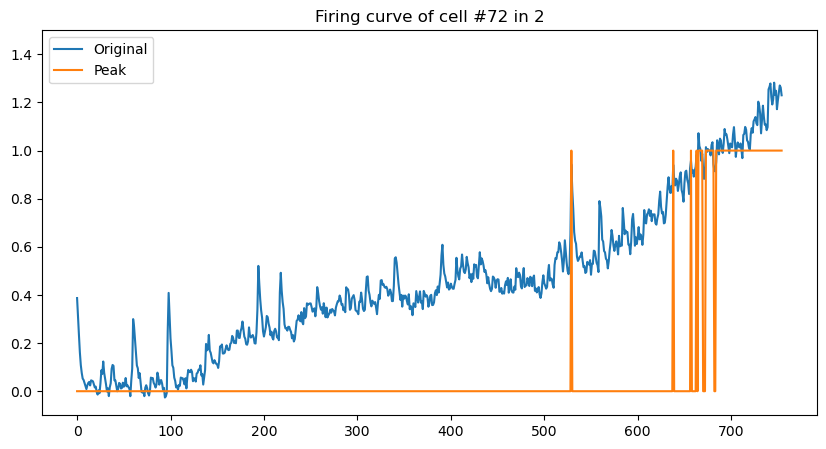

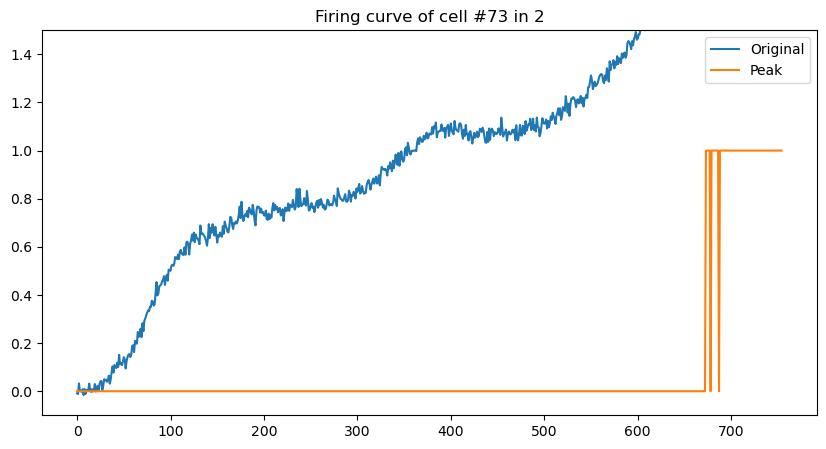

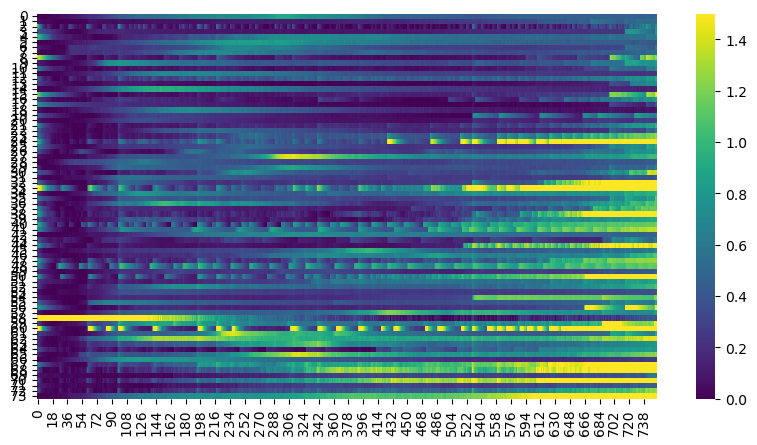

In [84]:
path = root.format(num=2)
signal = Suite2PCalciumSignal(path)
index = signal.index
os.makedirs(os.path.join(path,'fire'), exist_ok=True)
for i in index:
	signal.plot_curve(i, save = os.path.join(path,'fire'))

signal.plot_firing(save=path)